In [198]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [199]:
os.getcwd()

'D:\\DataS\\CourseEra\\Exercise\\machine-learning-ex7\\ex7'

In [200]:
os.chdir('D:\DataS\CourseEra\Exercise\machine-learning-ex7\ex7')

In [201]:
print('Initialize Centroids')

Initialize Centroids


In [202]:
k = 16 #Number of Centroids

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


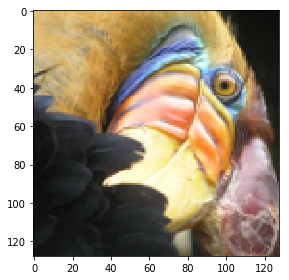

In [203]:
image = io.imread('bird_small.png')
io.imshow(image)
io.show()

In [204]:
image = image.reshape(image.shape[0]*image.shape[1],3)

In [205]:
image.shape

(16384, 3)

In [206]:
#Perform Normalization

image = image/255

In [207]:
ClusterCentroids  = np.random.rand(k,3)
print(ClusterCentroids)

[[0.815071   0.69509527 0.6210045 ]
 [0.52576414 0.79455442 0.77254952]
 [0.38892389 0.98945552 0.85566398]
 [0.92442358 0.21132306 0.13825247]
 [0.85521685 0.23612327 0.59051479]
 [0.95063185 0.06168795 0.28378935]
 [0.00687408 0.76084819 0.89121539]
 [0.56874386 0.52285376 0.95773202]
 [0.67547024 0.14861695 0.12165695]
 [0.25263667 0.92040383 0.47623192]
 [0.98987683 0.87628856 0.46325777]
 [0.01011944 0.67416127 0.10753761]
 [0.82358567 0.74713636 0.43279772]
 [0.52489792 0.95623833 0.82631742]
 [0.63252578 0.73852151 0.11639224]
 [0.66559357 0.9022532  0.36629579]]


In [208]:
ClusterCentroids.shape

(16, 3)

In [211]:
#Initialize Cluster Index for each Image
ClusterIndex = np.zeros(image.shape[0])
ClusterIndex = np.int16(ClusterIndex)

In [212]:
ClusterIndex.shape

(16384,)

In [213]:
def ComputeCost(ClusterCentroids, image,ClusterIndex):
    #print('Computing Cost')
    #print(image.shape[0])
    TotalCost = 0
    for i in range(image.shape[0]):
        #print('Processing '+ str(i)+'th row of image')
        #minCost = 0
        #minCostIndex = 0
        
        for j in range(ClusterCentroids.shape[0]):
        #    print('Processing '+ str(j)+'th cluster centroid')
            if j==0:
                Cost =sum(image[i] - ClusterCentroids[j])**2
                minCostIndex = j
                minCost = Cost
                #print('Cluster index is reset to '+str(j))
            else:
                Cost = sum(image[i] - ClusterCentroids[j])**2
                if Cost < minCost:
                    minCost = Cost
                    minCostIndex = j
                else:
                    pass
        
        #print('Processing '+ str(i)+'th row of image cluster assigned is ' + str(minCostIndex)) 
        
        
        TotalCost = TotalCost + minCost
        ClusterIndex[i] = minCostIndex
        
    return TotalCost, ClusterIndex
            #print(minCostIndex)
        
    
    

In [214]:
def updateCentroids(ClusterIndex,image):
    cnt = 0 
    for i in np.unique(ClusterIndex):
    #print(i)
        items = np.where(ClusterIndex == i)[0].shape[0]
        temp = (1/items)*np.sum(image[np.where(ClusterIndex == i)],axis = 0).reshape(1,3)
    #print(temp.shape)
        if cnt ==0 :
            NewClusterCentrid = temp#.reshape(1,3)
        else:
            #print(cnt)
            NewClusterCentrid = np.concatenate((NewClusterCentrid,temp), axis =0)
        cnt = cnt + 1 
    return NewClusterCentrid
    

In [215]:
iter  = 100
for i in range(iter):
    Cost,ClusterIndex = ComputeCost(ClusterCentroids,image,ClusterIndex)
    #print(Cost)
    ClusterCentroids = updateCentroids(ClusterIndex,image)


1330.359552384505
197.4751810566664
141.4902937993215
119.6822507073802
107.74676858766581
98.70150140282243
91.77920445254934
85.77047226313258
80.59473423147011
75.83485993038153
71.86907369764977
68.48750788676513
65.96167870217815
64.17463500061173
62.70389238018236
61.17578671667609
59.861433194003354
58.80978002864203
57.75356513820581
56.84456825542265
55.90521966887405
54.958245633207845
54.09102250711489
53.47234105456155
52.8069206878909
52.275984094588146
51.66220416063043
50.9464367530619
50.355965934656815
49.85550785921136
49.3604529406665
48.8474091738462
48.35667532135435
47.998910548170244
47.63417204915965
47.29349601582522
46.93579761668316
46.64541512460421
46.37625702084849
46.06926853248
45.81292519626664
45.4948236635782
45.19191566428117
44.87960056246801
44.589071592329994
44.35517155522691
44.0901613067418
43.907285740053965
43.724345302455994
43.50873181435008
43.31664526757564
43.14691771960616
43.005375103171126
42.84269710412955
42.66786678978319
42.507376

In [216]:
ClusterCentroids

array([[0.88413943, 0.78822284, 0.66034858],
       [0.85189146, 0.74188288, 0.58923219],
       [0.92971922, 0.85160111, 0.70029006],
       [0.22999043, 0.21063236, 0.19880938],
       [0.69385572, 0.55493834, 0.38579432],
       [0.35430172, 0.28631453, 0.23724156],
       [0.62070268, 0.49023423, 0.35287633],
       [0.82892586, 0.70964005, 0.51521942],
       [0.13889581, 0.14509316, 0.13588504],
       [0.54829581, 0.43195322, 0.30358421],
       [0.98682353, 0.97640642, 0.85639929],
       [0.07979426, 0.08645032, 0.07609064],
       [0.79869757, 0.66081821, 0.46472194],
       [0.96929194, 0.91788671, 0.7591939 ],
       [0.4581565 , 0.36556093, 0.26960784],
       [0.74106454, 0.60963795, 0.43553343]])

In [239]:
ClusterIndex = np.int16(ClusterIndex)

In [240]:
np.unique(ClusterIndex)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int16)

In [241]:
compImage = []
for i in ClusterIndex:
    compImage.append(ClusterCentroids[i,:])

In [243]:
compImageArr = np.array(compImage)
compImageArr

array([[0.79869757, 0.66081821, 0.46472194],
       [0.82892586, 0.70964005, 0.51521942],
       [0.82892586, 0.70964005, 0.51521942],
       ...,
       [0.22999043, 0.21063236, 0.19880938],
       [0.13889581, 0.14509316, 0.13588504],
       [0.13889581, 0.14509316, 0.13588504]])

In [245]:
compImagefinal = compImageArr*255
compImagefinal = np.int16(compImagefinal)
compImagefinal

array([[203, 168, 118],
       [211, 180, 131],
       [211, 180, 131],
       ...,
       [ 58,  53,  50],
       [ 35,  36,  34],
       [ 35,  36,  34]], dtype=int16)

In [235]:
#compImagefinal = compImageArr*255

In [246]:
compImagefinal = compImagefinal.reshape(128,128,3)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


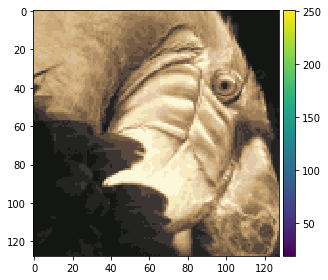

In [247]:
io.imshow(compImagefinal)
io.show()

In [248]:
import scipy.misc
scipy.misc.imsave('compressed_bird_image.jpg', compImagefinal)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


We can see that a 33kb image file is compressed to 5 kb image